In [32]:
# cargar las librerías

import matplotlib.pyplot as plt
import h3
import pandas as pd 
import geopandas as gpd
import folium
import branca.colormap as cm
from shapely.geometry import Point
import shapely

In [9]:
# cargar los geodataframe desde su directorio

barrios = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\GeoPandasOptimizado\4326\barrios.shp")
radios = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\GeoPandasOptimizado\4326\radios.shp")
union_2 = gpd.read_file(r"C:\Users\UserMCR\Desktop\Agustín\censo2022\Proyecto\proyecto_avanzado\union2\union2.shp")

In [10]:
# crear un dataframe con coordenadas

data = {"lat": [40.7128, 34.0522],
        "lng": [-74.0060, -118.2437]}
df = pd.DataFrame(data)

# convertir las coordenadas en un geodataframe
ejemplo = gpd.GeoDataFrame(df,
                       geometry = gpd.GeoSeries.from_xy(df.lng, df.lat))

# agregar columna con el índice H3
ejemplo["h3_index"] = ejemplo.apply(lambda row: h3.latlng_to_cell(row["lat"], row["lng"], 9), axis = 1)

print(ejemplo)

       lat       lng                     geometry         h3_index
0  40.7128  -74.0060   POINT (-74.00600 40.71280)  892a1072893ffff
1  34.0522 -118.2437  POINT (-118.24370 34.05220)  8929a1d7577ffff


#### Following "deep charts" video tutorial for h3 indexation

In [11]:
# set coordinates and resolution

lat = -45.8060000
lng = -67.4879869

In [12]:
# convert coordinates to H3

h3_index = h3.latlng_to_cell(lat, lng, 10) # resolution = 10
print(f"H3 Index: {h3_index}")

# esto me arroja el índice H3 de esas coordenadas

H3 Index: 8acf9e1531b7fff


In [13]:
# convert H3 to coordinates
# inverted process

lat_lng = h3.cell_to_latlng(h3_index)
print(f"Latitude/Longitude: {lat_lng}")

Latitude/Longitude: (-45.805744589836415, -67.48776340848417)


In [14]:
# get the geographic boundary of the H3 cell
# convert H3 to geometry boundary

boundary = h3.cell_to_boundary(h3_index)
print(f"Boundary: {boundary}")

Boundary: ((-45.80636110912891, -67.48741887243419), (-45.80585539213191, -67.48692168115137), (-45.80523887672223, -67.48726621775347), (-45.80512806873713, -67.48810793733912), (-45.805633780249515, -67.48860514090742), (-45.806250305231664, -67.48826061260495))


In [15]:
# map the boundary
## create a map

map = folium.Map(location = [lat, lng], zoom_start = 16)

# add the H3 cell to the map

folium.Polygon(locations = boundary, color = "blue", weight = 5).add_to(map)

# save the map

map

In [16]:
# import data

radios.head(1)

,area,perimetro,provincia,dpto,frac,radio,tipo,link,pob2022,viv2022,nombre,geometry
0,1983406.875,9684.93,26,021,07,01,U,260210701,329.0,123.0,None,"POLYGON ((-67.50260 -45.73632, -67.50264 -45.7..."


In [17]:
# create a fuction to parse each row to create H3 index string and geometry boundaries

def compute_h3_and_boundaries(row, resolution = 8):
    lat = row["geometry"]
    lng = row["geometry"]
    h3_index = h3.latlng_to_cell(lat, lng, resolution)
    boundaries = h3.cell_to_boundary(h3_index)
    return pd.Series([h3_index, boundaries])

In [22]:
# implement function and check the results

## radios[["H3_Index", "Boundaries"]] = radios.apply(compute_h3_and_boundaries, axis = 1)

# (no funciona el código)

In [26]:
radios.head(1)

,area,perimetro,provincia,dpto,frac,radio,tipo,link,pob2022,viv2022,nombre,geometry
0,1983406.875,9684.93,26,021,07,01,U,260210701,329.0,123.0,None,"POLYGON ((-67.50260 -45.73632, -67.50264 -45.7..."


NameError: name 'cx' is not defined

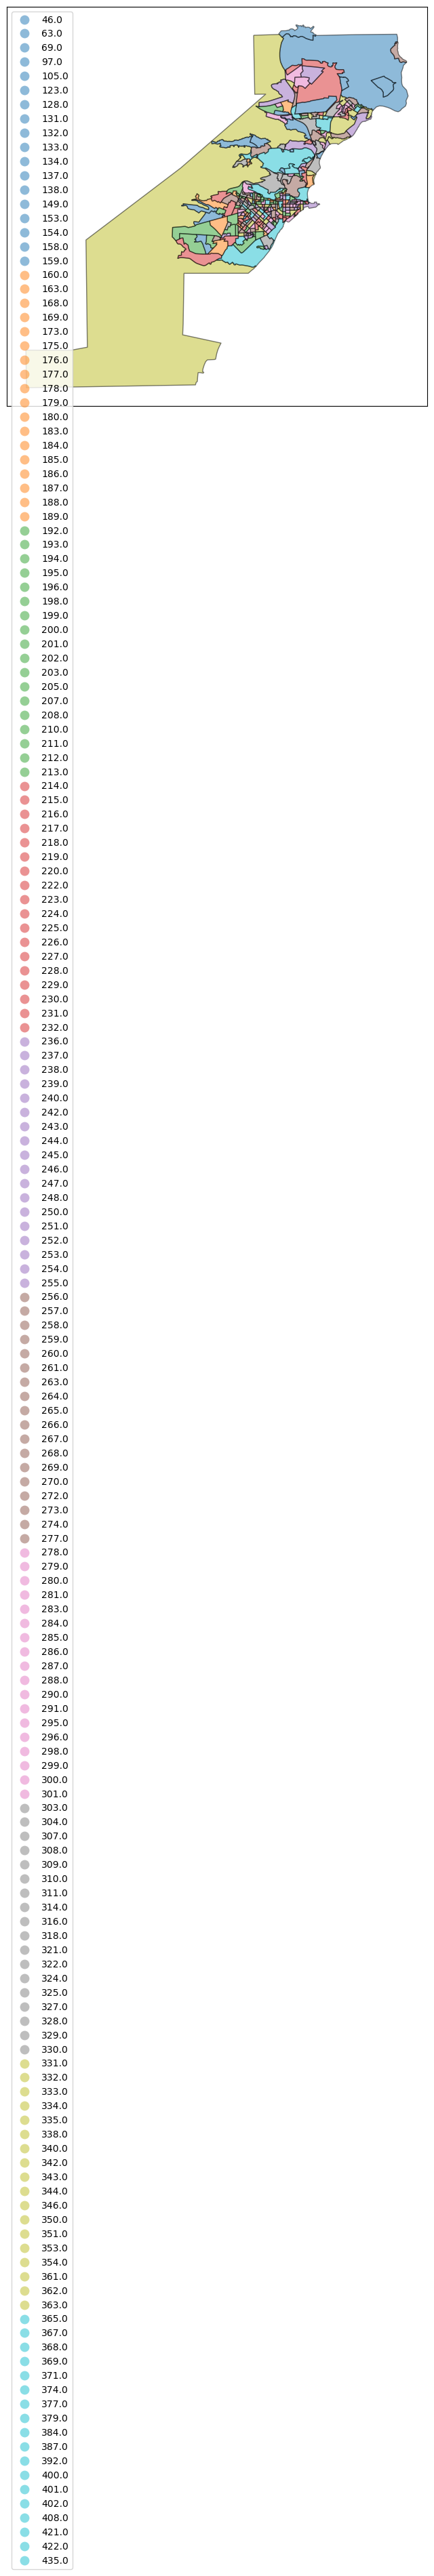

In [28]:
plot_df(radios, column = "viv2022")

In [ ]:
# seleccionar el geodataframe 

geo = radios.geometry[0]
type(geo)

shapely.geometry.polygon.Polygon

In [ ]:
# activar la función de la librería de shapely

shapely.geometry.multipolygon.MultiPolygon

shapely.geometry.multipolygon.MultiPolygon

In [ ]:
# pido los códigos de celda (valores que representan el centroide
# de cada celda para cada polígono del geodataframe

h3.geo_to_cells(geo, res = 10)

['8acf9e00dd4ffff',
 '8acf9e00d8b7fff',
 '8acf9e00caeffff',
 '8acf9e00c217fff',
 '8acf9e00dda7fff',
 '8acf9e00dcf7fff',
 '8acf9e00ca97fff',
 '8acf9e00c26ffff',
 '8acf9e00cb9ffff',
 '8acf9e00dc9ffff',
 '8acf9e00dc47fff',
 '8acf9e00d527fff',
 '8acf9e00c05ffff',
 '8acf9e00db97fff',
 '8acf9e00d107fff',
 '8acf9e00c31ffff',
 '8acf9e00da37fff',
 '8acf9e00c237fff',
 '8acf9e00d8d7fff',
 '8acf9e00c377fff',
 '8acf9e00dd6ffff',
 '8acf9e00cab7fff',
 '8acf9e00ca5ffff',
 '8acf9e0764dffff',
 '8acf9e00dc67fff',
 '8acf9e00dc0ffff',
 '8acf9e00dbb7fff',
 '8acf9e00db1ffff',
 '8acf9e00db5ffff',
 '8acf9e00db07fff',
 '8acf9e00c35ffff',
 '8acf9e00db77fff',
 '8acf9e00d127fff',
 '8acf9e00c307fff',
 '8acf9e00d567fff',
 '8acf9e00d50ffff',
 '8acf9e00c257fff',
 '8acf9e00d8f7fff',
 '8acf9e00dd8ffff',
 '8acf9e00dc27fff',
 '8acf9e00cad7fff',
 '8acf9e00d89ffff',
 '8acf9e00c14ffff',
 '8acf9e00ca1ffff',
 '8acf9e00dcdffff',
 '8acf9e00dc87fff',
 '8acf9e00dc2ffff',
 '8acf9e00dcd7fff',
 '8acf9e00c047fff',
 '8acf9e00c327fff',


NameError: name 'cx' is not defined

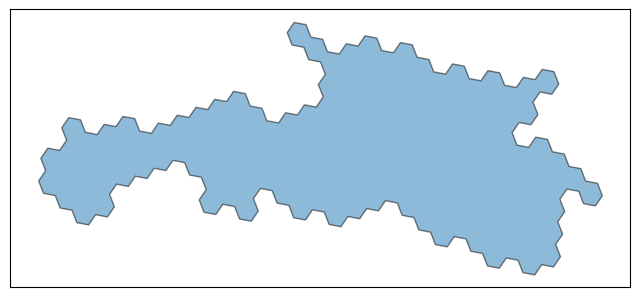

In [61]:
plot_cells(h3.geo_to_cells(geo, res = 10))

In [62]:
# convertir todas las geometrías de un geodatafame a celdas

cell_column = radios.geometry.apply(lambda x: h3.geo_to_cells(x, res = 10))
cell_column

0      [8acf9e00dda7fff, 8acf9e00dd5ffff, 8acf9e00d12...
1      [8acf9e00146ffff, 8acf9e02b71ffff, 8acf9e00284...
2      [8acf9eb86097fff, 8acf9ebb0577fff, 8acf9e14cd2...
3      [8acf9e0064effff, 8acf9e015b27fff, 8acf9e00648...
4      [8acf9e005a67fff, 8acf9e029437fff, 8acf9e005a0...
                             ...                        
297    [8acf9e1662affff, 8acf9e17534ffff, 8acf9e16678...
298    [8acf9e1602dffff, 8acf9e161597fff, 8acf9e161db...
299    [8acf9e175a87fff, 8acf9e175b9ffff, 8acf9e175a9...
300    [8acf9e175a1ffff, 8acf9e175a17fff, 8acf9e175ae...
301    [8acf9e0214f7fff, 8acf9e023bb7fff, 8acf9e023b1...
Length: 302, dtype: object

In [63]:
# convertir celdas a "geo objetos"

shape_column = cell_column.apply(h3.cells_to_h3shape)
shape_column

# note that the column now consists of LatLngPolt and LatLngMultiPoly objects

0                                    <LatLngPoly: [166]>
1                             <LatLngPoly: [708/(106,)]>
2                           <LatLngPoly: [2726/(6, 10)]>
3                                     <LatLngPoly: [92]>
4      (<LatLngPoly: [370]>, <LatLngPoly: [6]>, <LatL...
                             ...                        
297    (<LatLngPoly: [10]>, <LatLngPoly: [10]>, <LatL...
298                                  <LatLngPoly: [108]>
299                                   <LatLngPoly: [20]>
300                                   <LatLngPoly: [32]>
301                                   <LatLngPoly: [40]>
Length: 302, dtype: object

In [64]:
shape_column[0]

<LatLngPoly: [166]>

In [65]:
shape_column[1]

<LatLngPoly: [708/(106,)]>

In [66]:
# ahora, si asignamos df.geometry = shape_column, nuestros objetos H3Shape 
# se van a convertir automáticamente a objetos polígono y multipolígono 
# de shapely vía geo_interface

radios.geometry = shape_column
radios.geometry

0      POLYGON ((-67.46919 -45.72882, -67.47003 -45.7...
1      POLYGON ((-67.37738 -45.73578, -67.37772 -45.7...
2      POLYGON ((-67.50231 -45.73643, -67.50315 -45.7...
3      POLYGON ((-67.37679 -45.74099, -67.37714 -45.7...
4      MULTIPOLYGON (((-67.43635 -45.76112, -67.43719...
                             ...                        
297    MULTIPOLYGON (((-67.51135 -45.89063, -67.51169...
298    POLYGON ((-67.56155 -45.89033, -67.56189 -45.8...
299    POLYGON ((-67.52124 -45.89391, -67.52208 -45.8...
300    POLYGON ((-67.52224 -45.89492, -67.52258 -45.8...
301    POLYGON ((-67.43390 -45.79056, -67.43340 -45.7...
Name: geometry, Length: 302, dtype: geometry

In [67]:
# pido el tipo de objeto dentro de la columna geometría del gdf radios
type(radios.geometry[0])

shapely.geometry.polygon.Polygon

NameError: name 'cx' is not defined

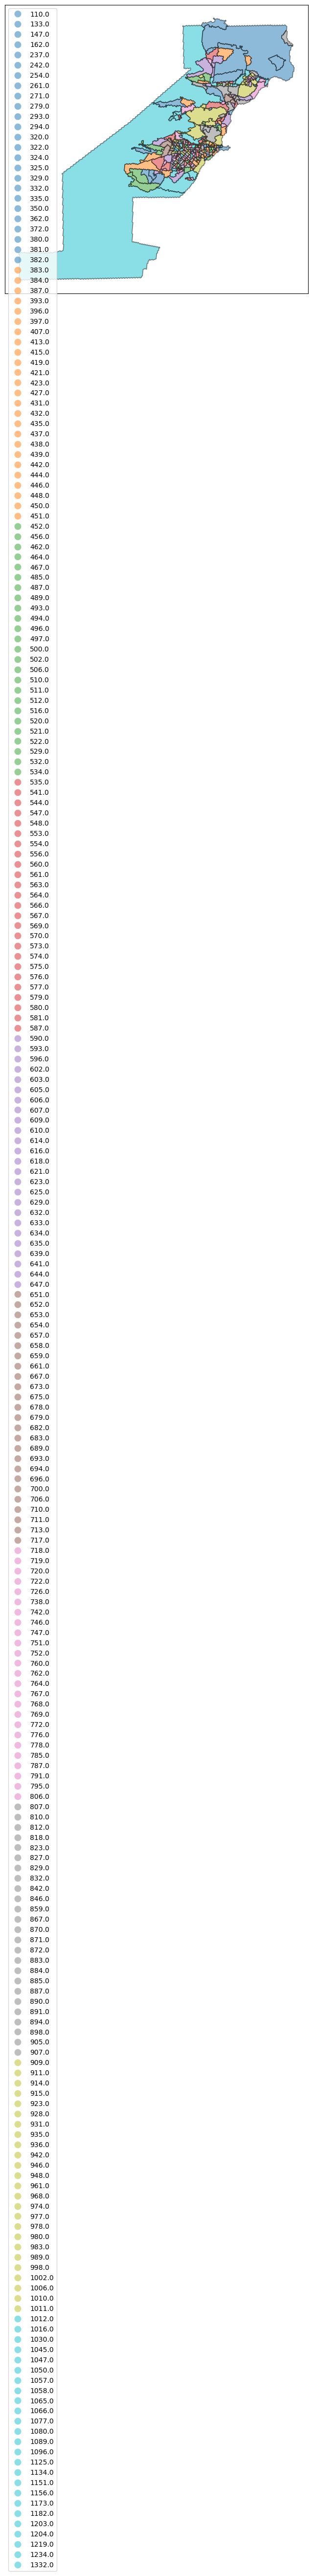

In [68]:
# tomamos algunos objetos con geometría shapely, los convertimos a celdas H3
# y volvimos a convertirlos a objetos con geométria shapely en un GDF de geopandas
# para visualizar los resultados podemos usar

plot_df(radios, column = "pob2022")

<Axes: >

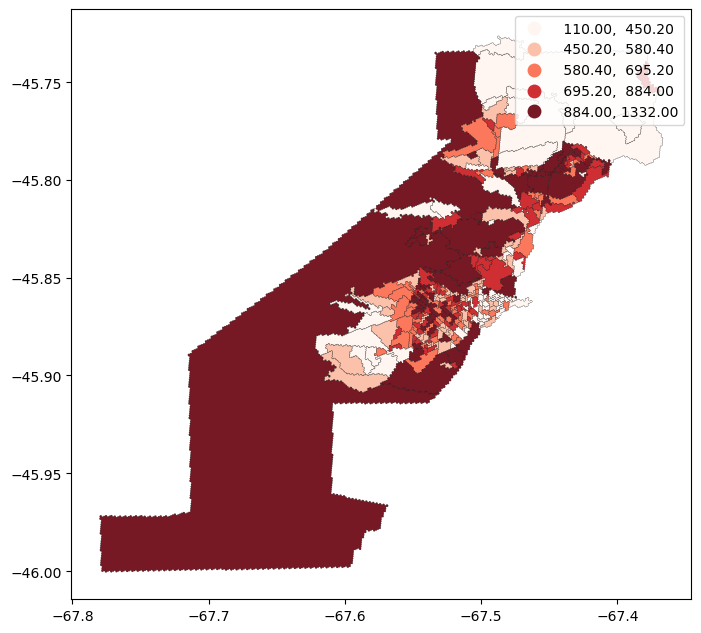

In [85]:
radios.plot("pob2022",
            figsize = (8, 8),
            legend = True,
            scheme = "quantiles",
            cmap = "Reds",
            alpha = 0.9,
            edgecolor = "black",
            linewidth = 0.2)

In [99]:
radios.explore("pob2022",
               scheme = "quantiles",
               cmap = "magma_r")